In [29]:
import pandas as pd
import tmplot as tmp
import matplotlib.dates as md
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from statistics import mean
from statsmodels.tsa.stattools import adfuller
sns.set_theme(palette="pastel")
import json
from flatten_json import flatten

In [2]:
work_dir = "D:/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data"

In [72]:
with open(work_dir + "/Comment/comments-adaption-hurdles.json", encoding="utf8") as json_file:
    data = json.load(json_file)

data_list = []
i = 0
for entry in data:
    flatten_data = flatten(data[i])
    try:
        choice_0 = flatten_data["annotations_0_result_0_value_choices_0"]
    except:
        choice_0 = False
    try:
        choice_1 = flatten_data["annotations_0_result_0_value_choices_1"]
    except:
        choice_1 = False
    try:
        choice_2 = flatten_data["annotations_0_result_0_value_choices_2"]
    except:
        choice_2 = False
    try:
        choice_3 = flatten_data["annotations_0_result_0_value_choices_3"]
    except:
        choice_3 = False
    try:
        choice_4 = flatten_data["annotations_0_result_0_value_choices_4"]
    except:
        choice_4 = False
    try:
        choice_5 = flatten_data["annotations_0_result_0_value_choices_5"]
    except:
        choice_5 = False
    try:
        choice_6 = flatten_data["annotations_0_result_0_value_choices_6"]
    except:
        choice_6 = False
    
    if choice_0 is not False:
        temp_list = [choice_0, flatten_data["data_published_at"], flatten_data["data_comment_id"]]
        data_list.append(temp_list)

    if choice_1 is not False:
        temp_list = [choice_1, flatten_data["data_published_at"], flatten_data["data_comment_id"]]
        data_list.append(temp_list)

    if choice_2 is not False:
        temp_list = [choice_2, flatten_data["data_published_at"], flatten_data["data_comment_id"]]
        data_list.append(temp_list)
    if choice_3 is not False:
        temp_list = [choice_3, flatten_data["data_published_at"], flatten_data["data_comment_id"]]
        data_list.append(temp_list)
    if choice_4 is not False:
        temp_list = [choice_4, flatten_data["data_published_at"], flatten_data["data_comment_id"]]
        data_list.append(temp_list)
    if choice_5 is not False:
        temp_list = [choice_5, flatten_data["data_published_at"], flatten_data["data_comment_id"]]
        data_list.append(temp_list)
    if choice_6 is not False:
        temp_list = [choice_6, flatten_data["data_published_at"], flatten_data["data_comment_id"]]
        data_list.append(temp_list)
    i = i + 1


In [77]:
print(len(data_list))
print(data_list)

hurdles_df = pd.DataFrame(data_list, columns = ['Reason', 'Data', 'Comment_ID'])
print(hurdles_df)

1226
[['Electricity price', '2021-05-25T20:10:48Z', 'UgzmfkeUgGimgM30FQh4AaABAg'], ['Other', '2021-05-04T16:00:31Z', 'UgwUIBdvTpLvXHr5S5t4AaABAg'], ['EV price', '2021-05-04T16:00:31Z', 'UgwUIBdvTpLvXHr5S5t4AaABAg'], ['None', '2021-10-10T07:45:02Z', 'Ugx6x6UQB0IW0oR8wfR4AaABAg'], ['Service problems', '2022-01-10T09:40:46Z', 'UgwmzlwoVWwo4Tgj96J4AaABAg'], ['Service problems', '2022-01-10T09:40:46Z', 'Ugyj9KU84hD_Pv3NECd4AaABAg'], ['Other', '2022-02-11T17:29:35Z', 'UgzGsGxoF2JSJtC16wN4AaABAg'], ['Service problems', '2022-02-25T15:30:07Z', 'Ugw5dI7Tzq_rJAECzW94AaABAg'], ['Habbit', '2020-07-24T16:00:00Z', 'Ugzr8TNGdXgSart0Oud4AaABAg'], ['None', '2020-07-15T07:03:15Z', 'Ugxez6h3F3z_Djzc3aJ4AaABAg'], ['Other', '2021-07-16T14:11:25Z', 'UgwNEU0YfKQzjC_hWkd4AaABAg'], ['Energy supply', '2021-07-16T14:11:25Z', 'UgwNEU0YfKQzjC_hWkd4AaABAg'], ['None', '2020-08-18T17:19:32Z', 'UgzM-OjMzR4KwjIOVQV4AaABAg'], ['Other', '2020-10-18T08:00:04Z', 'UgzBqNXQzPtIxiBHv8t4AaABAg'], ['None', '2020-11-27T16:46:54Z

In [93]:
print(hurdles_df.loc[hurdles_df['Reason'] == "None"])

hurdles_df = hurdles_df.drop(hurdles_df[hurdles_df.Reason == "None"].index)
hurdles_df = hurdles_df.drop(hurdles_df[hurdles_df.Reason == "Sarcasm"].index)


print(hurdles_df)

Empty DataFrame
Columns: [Reason, Data, Comment_ID]
Index: []
                                             Reason                  Data  \
0                                 Electricity price  2021-05-25T20:10:48Z   
1                                             Other  2021-05-04T16:00:31Z   
2                                          EV price  2021-05-04T16:00:31Z   
4                                  Service problems  2022-01-10T09:40:46Z   
5                                  Service problems  2022-01-10T09:40:46Z   
...                                             ...                   ...   
1221                                          Other  2021-11-24T14:00:11Z   
1222  Charging infrastructure availability national  2021-11-24T14:00:11Z   
1223                                  Charging time  2021-11-24T14:00:11Z   
1224                                  Energy supply  2021-11-24T14:00:11Z   
1225                                  Energy supply  2021-01-03T08:00:04Z   

             

Index(['Battery (environmental concerns)', 'Car quality problems (Tesla)',
       'Car quality problems (VW)', 'Car quality problems (other)',
       'Car software (Tesla)', 'Car software (VW)', 'Car software (other)',
       'Charging infrastructure availability abroad',
       'Charging infrastructure availability national',
       'Charging infrastructure location',
       'Charging infrastructure not working', 'Charging time', 'EV price',
       'Electricity price', 'Energy supply', 'Habbit', 'Other',
       'Range anxiety', 'Selection of EVs', 'Service problems',
       'Tariff jungle', 'Used car (availabilty)', 'Used car (resell value)'],
      dtype='object', name='Reason')


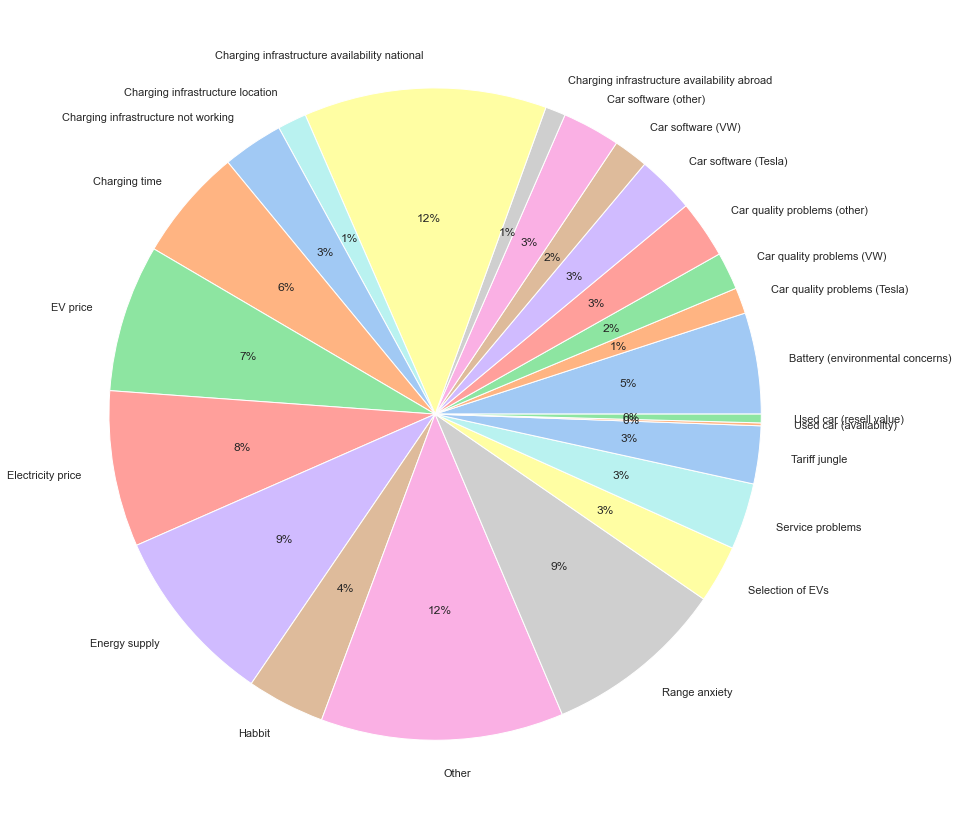

In [107]:
plot_data = hurdles_df.groupby(['Reason']).size()
print(plot_data.index)

plt.figure(figsize=(15,15))

plt.pie(plot_data, labels=plot_data.index, autopct='%.0f%%',wedgeprops = {'linewidth': 1})
plt.show()